### Here are the simple examples for plotting nomogram, ROC curves, Calibration curves, and Decision curves in training and test dataset by using R language.

In [2]:
# Library and data
library(rms)
library(pROC)
library(rmda)
train <-read.csv("E:/Experiments/YinjunDong/nomogram/EGFR-nomogram.csv")
test <-read.csv("E:/Experiments/YinjunDong/nomogram/EGFR-nomogram-test.csv")

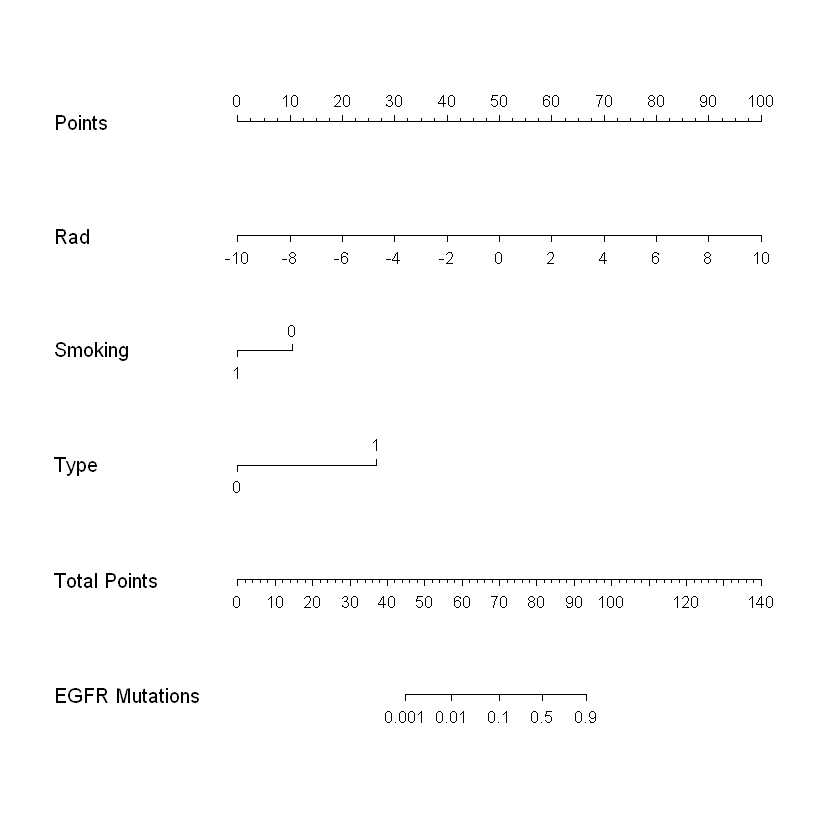

In [4]:
# Nomogram
dd=datadist(train)
options(datadist="dd")
f1 <- lrm(EGFR~ Rad
          +Smoking
          +Type
          ,data = train,x = TRUE,y = TRUE)

nom <- nomogram(f1, fun=plogis,fun.at=c(.001, .01, seq(.1,.9, by=.4)), lp=F, funlabel="EGFR Mutations")
plot(nom)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



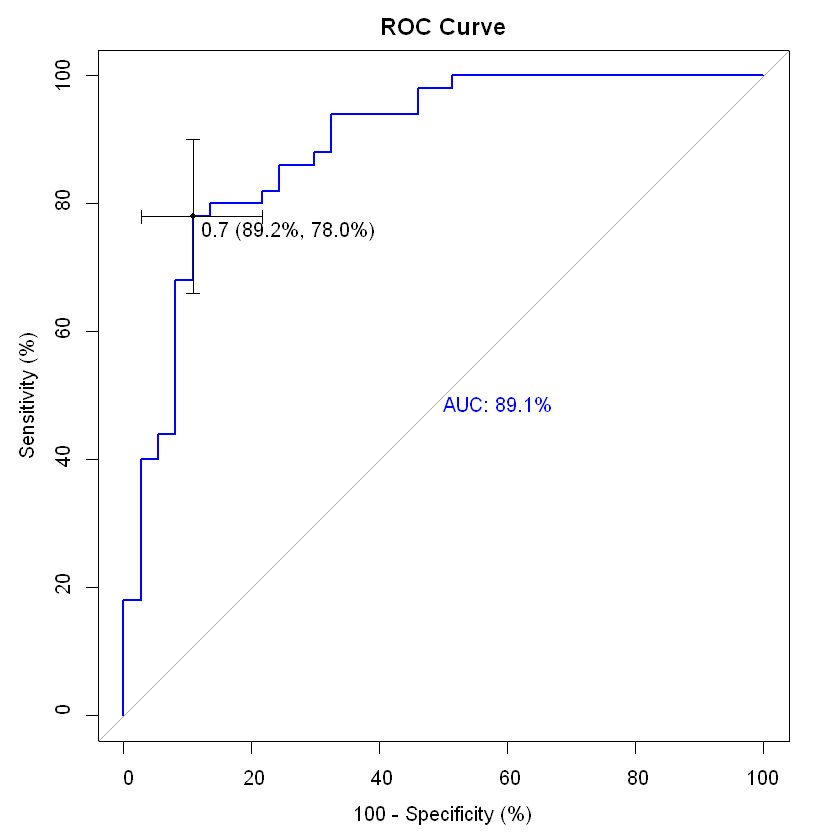

In [5]:
# ROC train
f2 <- glm(EGFR~ Rad
          +Smoking
          +Type
          ,data = train,family = "binomial")

pre <- predict(f2, type='response')
plot.roc(train$EGFR, pre,
         main="ROC Curve", percent=TRUE,
         print.auc=TRUE,
         ci=TRUE, ci.type="bars", 
         of="thresholds",
         thresholds="best",
         print.thres="best",
         col="blue"
         #,identity=TRUE
         ,legacy.axes=TRUE,
         print.auc.x=ifelse(50,50),
         print.auc.y=ifelse(50,50)
         )

Setting levels: control = 0, case = 1

Setting direction: controls < cases



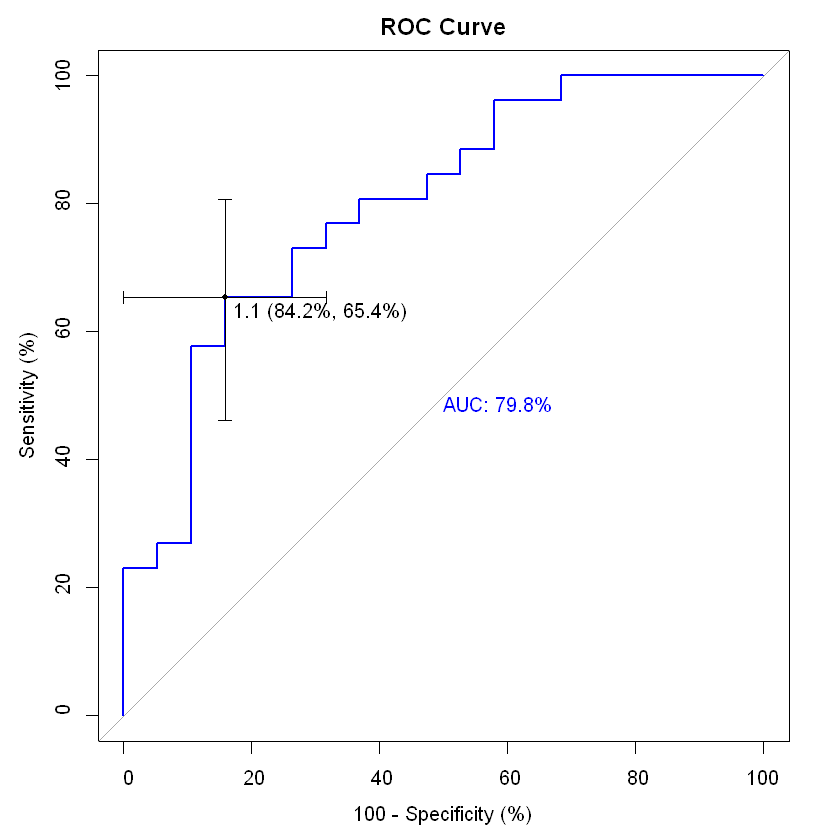

In [6]:
# ROC test
pre1 <- predict(f2,newdata = test)
plot.roc(test$EGFR, pre1,
         main="ROC Curve", percent=TRUE,
         print.auc=TRUE,
         ci=TRUE, ci.type="bars",
         of="thresholds",
         thresholds="best",
         print.thres="best",
         col="blue",legacy.axes=TRUE,
         print.auc.x=ifelse(50,50),
         print.auc.y=ifelse(50,50)
         )

Setting levels: control = 0, case = 1

Setting direction: controls < cases



95% CI: 0.8202-0.9615 (DeLong)

singular information matrix in lrm.fit (rank= 3 ).  Offending variable(s):
Type 

Divergence or singularity in 1 samples

n=87   Mean absolute error=0.012   Mean squared error=0.00019
0.9 Quantile of absolute error=0.02



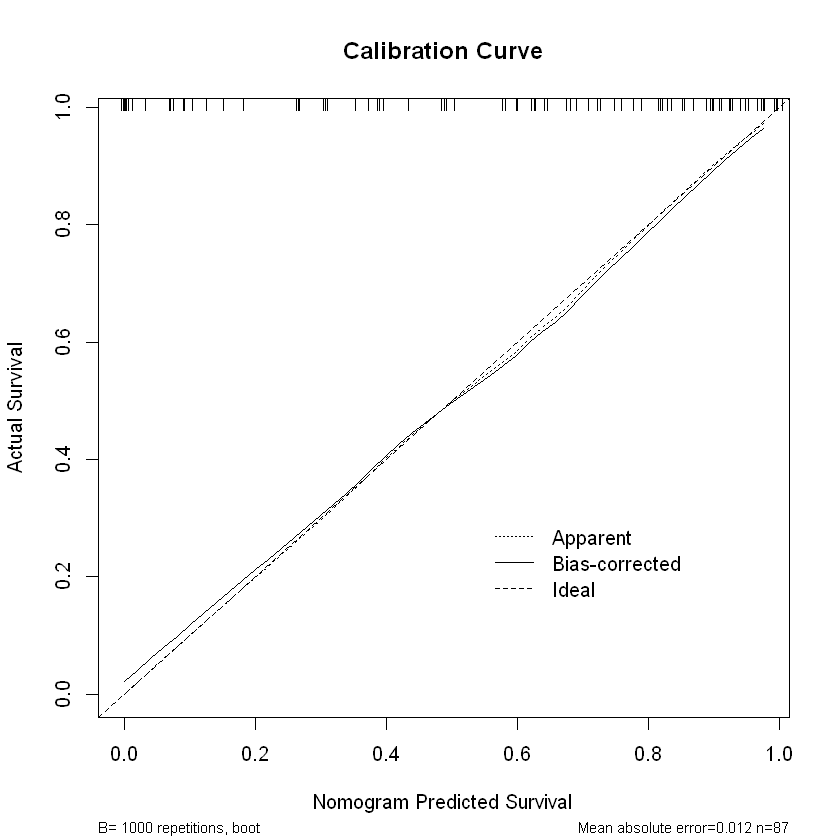

In [7]:
# Calibration Curve train
rocplot1 <- roc(train$EGFR, pre)
ci.auc(rocplot1)
cal <- calibrate(f1,  method = "boot", B = 1000)
plot(cal, xlab = "Nomogram Predicted Survival", ylab = "Actual Survival",main = "Calibration Curve")

Setting levels: control = 0, case = 1

Setting direction: controls < cases



95% CI: 0.6644-0.9307 (DeLong)


n=45   Mean absolute error=0.029   Mean squared error=0.00123
0.9 Quantile of absolute error=0.058



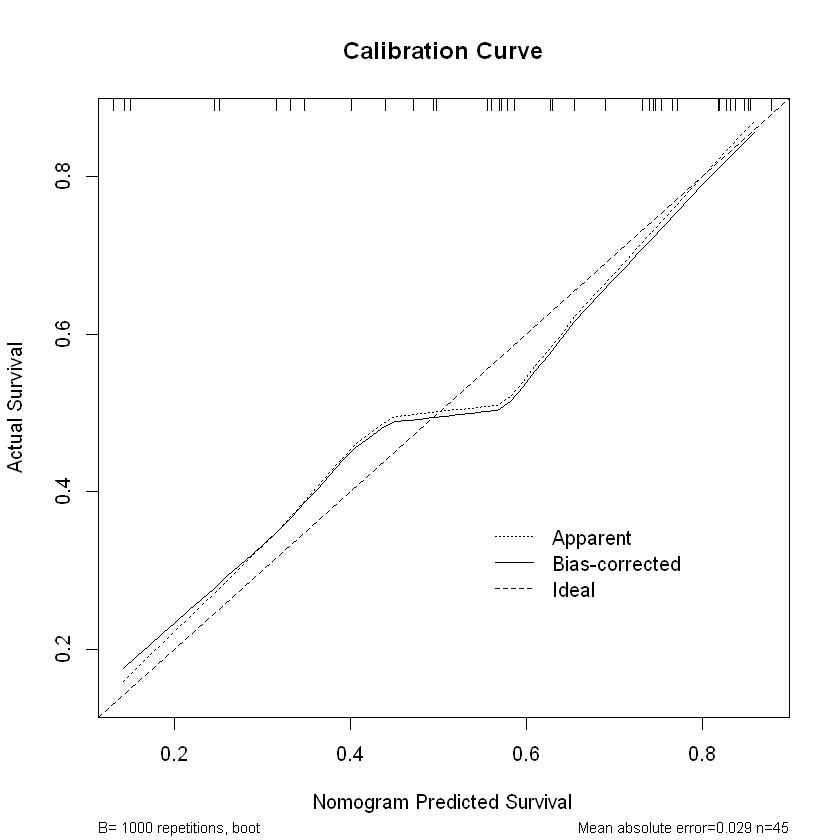

In [8]:
# Calibration Curve test
rocplot2 <- roc(test$EGFR,pre1)
ci.auc(rocplot2)
f3 <- lrm(test$EGFR ~ pre1,x = TRUE,y = TRUE)
cal2 <- calibrate(f3,  method = "boot", B = 1000)
plot(cal2, xlab = "Nomogram Predicted Survival", ylab = "Actual Survival",main = "Calibration Curve")

Calculating net benefit curves for case-control data. All calculations are done conditional on the outcome prevalence provided.

Calculating net benefit curves for case-control data. All calculations are done conditional on the outcome prevalence provided.

Note:  The data provided is used to both fit a prediction model and to estimate the respective decision curve. This may cause bias in decision curve estimates leading to over-confidence in model performance. 

Calculating net benefit curves for case-control data. All calculations are done conditional on the outcome prevalence provided.

Note:  The data provided is used to both fit a prediction model and to estimate the respective decision curve. This may cause bias in decision curve estimates leading to over-confidence in model performance. 

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted proba

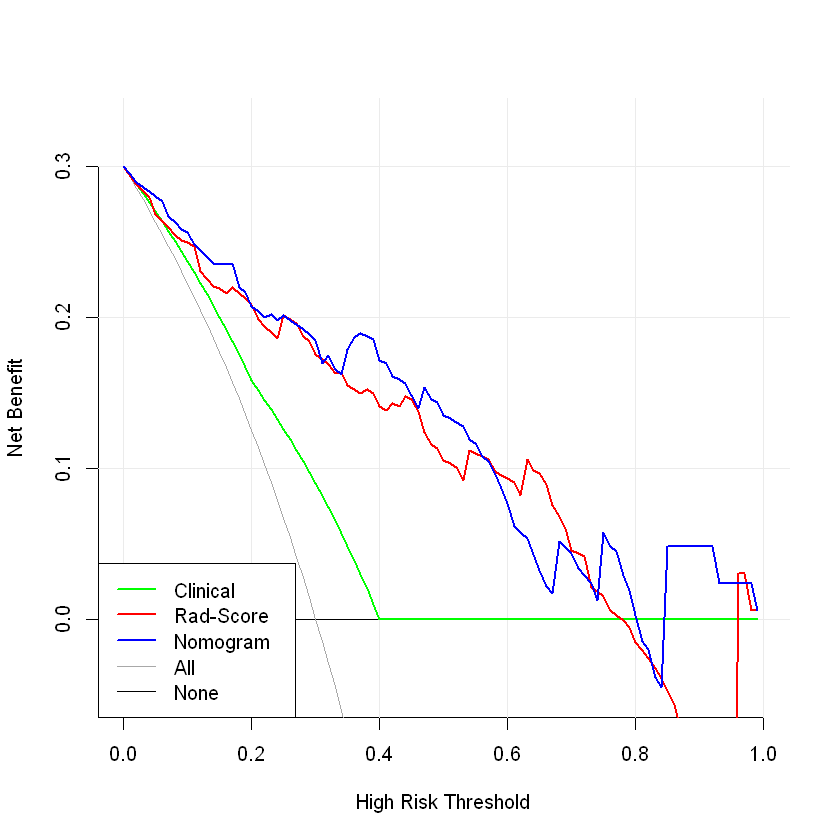

In [9]:
# Decision Curve train
Rad<- decision_curve(EGFR~ 
                          Rad, data = train, family = binomial(link ='logit'),
                          thresholds= seq(0,1, by = 0.01),
                          confidence.intervals =0.95,study.design = 'case-control',
                          population.prevalence = 0.3)

Clinical<- decision_curve(EGFR~ 
                         Smoking+Type, data = train, family = binomial(link ='logit'),
                         thresholds= seq(0,1, by = 0.01),
                         confidence.intervals =0.95,study.design = 'case-control',
                         population.prevalence = 0.3)

clinical_Rad<- decision_curve(EGFR~ Rad
                         +Smoking+Type, data = train,
                         family = binomial(link ='logit'), thresholds = seq(0,1, by = 0.01),
                         confidence.intervals= 0.95,study.design = 'case-control',
                         population.prevalence= 0.3)

List<- list(Clinical,Rad,clinical_Rad)
plot_decision_curve(List,curve.names= c('Clinical','Rad-Score','Nomogram'),
                    cost.benefit.axis =FALSE,col = c('green','red','blue'),
                    confidence.intervals =FALSE,standardize = FALSE,
                    #legend.position = "none"
                    legend.position = "bottomleft"
                    )

Calculating net benefit curves for case-control data. All calculations are done conditional on the outcome prevalence provided.

Calculating net benefit curves for case-control data. All calculations are done conditional on the outcome prevalence provided.

Note:  The data provided is used to both fit a prediction model and to estimate the respective decision curve. This may cause bias in decision curve estimates leading to over-confidence in model performance. 

Calculating net benefit curves for case-control data. All calculations are done conditional on the outcome prevalence provided.

Note:  The data provided is used to both fit a prediction model and to estimate the respective decision curve. This may cause bias in decision curve estimates leading to over-confidence in model performance. 

Note: When multiple decision curves are plotted, decision curves for 'All' are calculated using the prevalence from the first DecisionCurve object in the list provided.



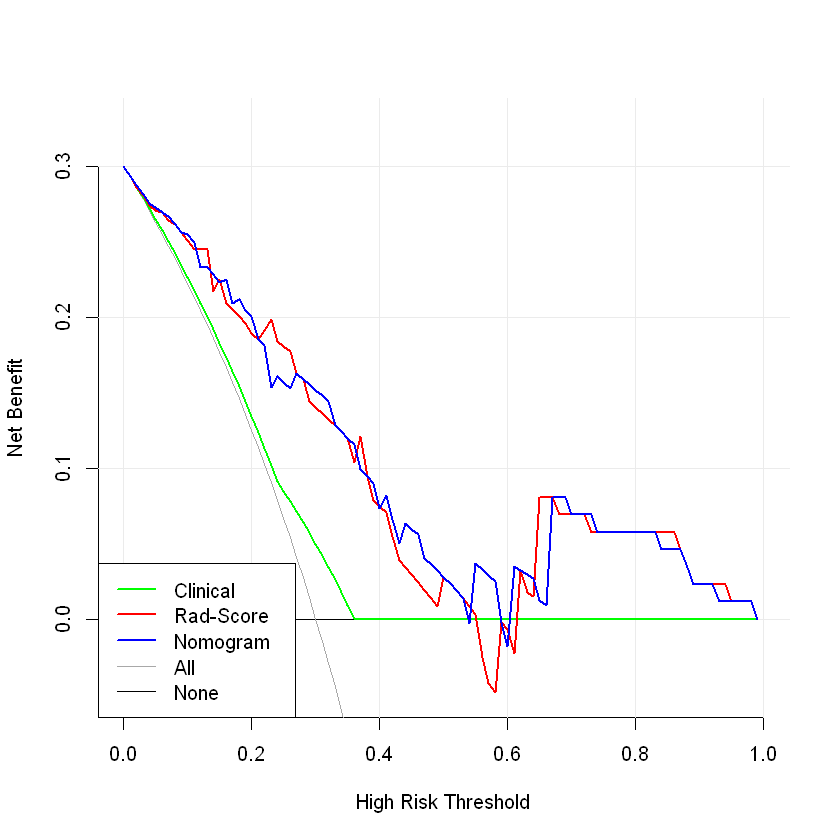

In [10]:
# Decision Curve test
Rad1<- decision_curve(EGFR~ 
                     Rad, data = test, family = binomial(link ='logit'),
                     thresholds= seq(0,1, by = 0.01),
                     confidence.intervals =0.95,study.design = 'case-control',
                     population.prevalence = 0.3)

Clinical1<- decision_curve(EGFR~ 
                          Smoking+Type, data = test, family = binomial(link ='logit'),
                          thresholds= seq(0,1, by = 0.01),
                          confidence.intervals =0.95,study.design = 'case-control',
                          population.prevalence = 0.3)

clinical_Rad1<- decision_curve(EGFR~ Rad
                              +Smoking+Type, data = test,
                              family = binomial(link ='logit'), thresholds = seq(0,1, by = 0.01),
                              confidence.intervals= 0.95,study.design = 'case-control',
                              population.prevalence= 0.3)

List1<- list(Clinical1, Rad1, clinical_Rad1)
plot_decision_curve(List1,curve.names= c('Clinical','Rad-Score','Nomogram'),
                    cost.benefit.axis =FALSE,col = c('green','red','blue'),
                    confidence.intervals =FALSE,standardize = FALSE,
                    legend.position = "bottomleft")